In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
fnb = pd.read_csv('/content/drive/MyDrive/newnutcomp.csv')
fnb.head()

,food_id,Composition,Calories,Protein,Fat,Carbohydrate,Sugar
0,1001,"BUTTER,WITH SALT",717,0.85,81.11,0.06,0.06
1,1002,"BUTTER,WHIPPED,W/ SALT",718,0.49,78.30,2.87,0.06
2,1003,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0.00,0.00
3,1004,"CHEESE,BLUE",353,21.40,28.74,2.34,0.50
4,1005,"CHEESE,BRICK",371,23.24,29.68,2.79,0.51


In [3]:
allergen = pd.read_csv('/content/drive/MyDrive/newallergen.csv')
allergen.head()

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy


In [4]:
# Define the function to classify food based on nutritional values
def classify_food(row):
    if row['Sugar'] < 5 and row['Fat'] < 5 and row['Protein'] > 15 and 200 <= row['Calories'] <= 300:
        return 'A'
    elif 5 < row['Sugar'] <= 10 and 5 < row['Fat'] <= 10 and 10 < row['Protein'] <= 15 and 300 < row['Calories'] <= 400:
        return 'B'
    elif 10 < row['Sugar'] <= 20 and 10 < row['Fat'] <= 20 and row['Protein'] <= 10 and 400 < row['Calories'] <= 600:
        return 'C'
    else:
        return 'D'

# Function to get recommendation messages
def get_message(classification, has_diabetes=False):
    if classification == 'A':
        message = """Grade: 'A' Healthy Food
Overall: Excellent for health. This food is nutrient-dense and can help maintain weight and heart health
Sugar: Low (less than 5g per serving)
Fat: Low (less than 5g per serving, with minimal saturated fat)
Protein: High (more than 15g per serving)
Calories: Moderate (200-300 calories per serving)"""
        if has_diabetes:
            message += "\nNote: This food is suitable for individuals with diabetes due to its low sugar content."
    elif classification == 'B':
        message = """Grade: 'B' Good Food
Overall: Good for health. This food can be part of a balanced diet, although portion size and frequency of consumption should be monitored
Sugar: Moderate (5-10g per serving)
Fat: Moderate (5-10g per serving, with controlled saturated fat)
Protein: Moderate (10-15g per serving)
Calories: Moderate (300-400 calories per serving)"""
        if has_diabetes:
            message += "\nNote: Individuals with diabetes should consume this food in moderation due to its moderate sugar content."
    elif classification == 'C':
        message = """Grade: 'C' Fair Food
Overall: Should be consumed with caution. This food can be an occasional choice, but it should not be a mainstay in daily diet
Sugar: High (10-20g per serving)
Fat: High (10-20g per serving, with some saturated fat)
Protein: Low (less than 10g per serving)
Calories: High (400-600 calories per serving)"""
        if has_diabetes:
            message += "\nWarning: This food contains high sugar levels and is not recommended for individuals with diabetes."
    else:
        message = """Grade : 'D' Unhealthy Food
Overall: Not recommended for regular consumption. This food can contribute to health issues such as obesity, diabetes, and heart disease
Sugar: Very high (more than 20g per serving)
Fat: Very high (more than 20g per serving, with high saturated fat)
Protein: Very low (less than 5g per serving)
Calories: Very high (more than 600 calories per serving)"""
        if has_diabetes:
            message += "\nWarning: This food is extremely high in sugar and is unsafe for individuals with diabetes."
    return message

In [5]:
# Add the Grade_food column to the fnb dataset
fnb['Grade_food'] = fnb.apply(classify_food, axis=1)
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
fnb['Grade_food'] = fnb['Grade_food'].map(grade_mapping)

# Define features and target
X = fnb[['Sugar', 'Fat', 'Protein', 'Calories']].values
y = fnb['Grade_food'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target
y = to_categorical(y, num_classes=4)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9440 - loss: 0.2649 - val_accuracy: 0.9949 - val_loss: 0.0325
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.0271 - val_accuracy: 0.9949 - val_loss: 0.0229
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0218 - val_accuracy: 0.9949 - val_loss: 0.0173
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0162 - val_accuracy: 0.9949 - val_loss: 0.0159
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9971 - loss: 0.0142 - val_accuracy: 0.9949 - val_loss: 0.0160
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.0149 - val_accuracy: 0.9949 - val_loss: 0.0140
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0153 - val_accuracy: 0.9949 - val_loss: 0.0137
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.

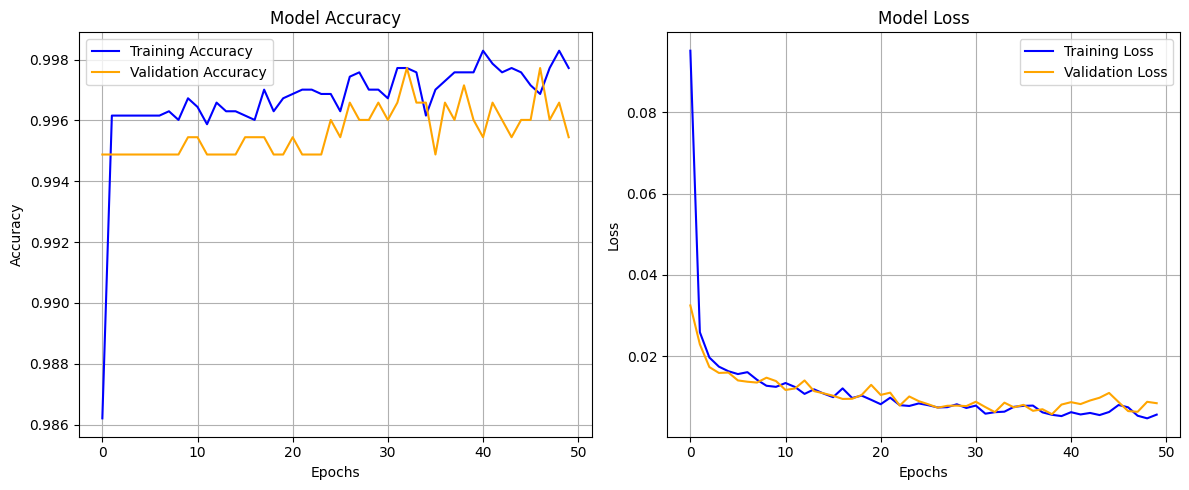

In [6]:
# Plot training history (Accuracy and Loss)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Loss plot
ax[1].plot(history.history['loss'], label='Training Loss', color='blue')
ax[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Collecting user inputs (including diabetes status)
user_inputs = {}

user_inputs['food_id'] = int(input("Enter the food you are selecting: "))  # Example: 1001
user_inputs['name'] = input("Enter your name: ")
user_inputs['age'] = int(input("Enter your age: "))
user_inputs['weight'] = float(input("Enter your weight (in kg): "))
user_inputs['height'] = float(input("Enter your height (in cm): "))
user_inputs['diabetes'] = input("Do you have diabetes? (Yes/No): ").strip().lower()
user_inputs['allergy'] = input("Enter any allergies you have (e.g., Lactose): ")

Enter the food you are selecting: 1001
Enter your name: Rina
Enter your age: 21
Enter your weight (in kg): 50
Enter your height (in cm): 160
Do you have diabetes? (Yes/No): yes
Enter any allergies you have (e.g., Lactose): lactose


In [8]:
# Retrieve food data based on food_id
selected_food = fnb[fnb['food_id'] == user_inputs['food_id']].iloc[0]  # Fetch the selected food row

if selected_food.empty:
    print("Food ID not found in the dataset.")
else:
    # Classify the food using the TensorFlow model
    classification = classify_food(selected_food)

    # Generate the recommendation message based on classification
    message = get_message(classification, user_inputs['diabetes'] == 'yes')  # Check diabetes status properly
    print(message)

    # Retrieve the food composition
    composition = selected_food['Composition']
    print(f"Contains: {composition}")

    # Check for allergy
    allergen_matches = allergen[allergen['Food'].str.contains(composition.split(',')[0], case=False, na=False)]

    if not allergen_matches.empty:
        found_allergy = False
        for index, row in allergen_matches.iterrows():
            if user_inputs['allergy'].lower() in row['Allergy'].lower():
                print(f"\n\033[1mWarning:\033[0m {user_inputs['food_id']} may contain {row['Food']} which is related to {row['Allergy']}. Please avoid it.")
                found_allergy = True
                break
        if not found_allergy:
            print(f"\n{user_inputs['food_id']} appears SAFE based on your allergy.")
    else:
        print(f"\n{user_inputs['food_id']} appears SAFE based on your allergy.")

Grade : 'D' Unhealthy Food
Overall: Not recommended for regular consumption. This food can contribute to health issues such as obesity, diabetes, and heart disease
Sugar: Very high (more than 20g per serving)
Fat: Very high (more than 20g per serving, with high saturated fat)
Protein: Very low (less than 5g per serving)
Calories: Very high (more than 600 calories per serving)
Contains: BUTTER,WITH SALT



In [9]:
#  Food filter predicted to have grade 'A'
grade_a_foods = fnb[fnb['Grade_food'] == 0]

# Result
print("Grade A Food:")
print(grade_a_foods[['Sugar', 'Fat', 'Protein', 'Calories']])

Grade A Food:
      Sugar   Fat  Protein  Calories
252    1.71  4.07    22.98       233
257    0.00  3.90    23.20       237
266    0.00  4.36    19.96       253
4499   0.00  2.37    62.82       290
4655   0.00  0.80    47.68       275
6540   0.41  4.25    15.55       216
8215   0.00  1.39    15.34       259
8347   0.00  2.60    57.00       251
8391   0.00  3.67    59.38       271
8404   0.00  2.31    62.38       270


In [10]:
#  Food filter predicted to have grade 'B'
grade_b_foods = fnb[fnb['Grade_food'] == 1]

# Result
print("Grade B Food:")
print(grade_b_foods[['Sugar', 'Fat', 'Protein', 'Calories']])

Grade B Food:
      Sugar   Fat  Protein  Calories
313    8.67  7.30    10.82       335
5621   6.20  5.30    13.35       395
5830   5.55  6.47    10.86       310
5861   5.74  5.48    14.13       383
7825   5.40  9.20    10.50       381
8249   8.20  6.56    11.48       388


In [11]:
#  Food filter predicted to have grade 'C'
grade_c_foods = fnb[fnb['Grade_food'] == 2]

# Result
print("Grade C Food:")
print(grade_c_foods[['Sugar', 'Fat', 'Protein', 'Calories']])

Grade C Food:
      Sugar    Fat  Protein  Calories
461   13.00  19.60     8.40       477
1559  10.26  18.33     7.68       438
5569  11.65  15.40     8.00       428
5689  17.60  12.80     5.60       430
5729  10.32  13.77     7.60       446
5738  15.48  16.40     7.30       455
5998  15.01  13.37     9.34       444
6010  10.41  19.50     7.19       464
6035  14.60  17.50     7.80       461
6037  11.80  18.00     9.50       463
6088  17.60  16.92     9.85       463
6886  17.98  17.95     7.02       403
7872  10.70  19.80     7.30       470
7875  10.10  13.90     6.10       441
7950  13.70  18.50     7.60       462
7965  12.90  20.00     8.60       415
8110  10.43  17.84     7.29       463
8116  11.11  16.67     8.33       437
8127  12.90  16.13     6.45       442
8613  15.40  10.50     9.00       403


In [12]:
#  Food filter predicted to have grade 'D'
grade_d_foods = fnb[fnb['Grade_food'] == 3]

# Result
print("Grade D Food:")
print(grade_d_foods[['Sugar', 'Fat', 'Protein', 'Calories']])

Grade D Food:
      Sugar    Fat  Protein  Calories
0      0.06  81.11     0.85       717
1      0.06  78.30     0.49       718
2      0.00  99.48     0.28       876
3      0.50  28.74    21.40       353
4      0.51  29.68    23.24       371
...     ...    ...      ...       ...
8785   0.00  25.10    18.50       305
8786   0.00   0.84    20.54       111
8787  73.20   0.00     0.00       269
8788   0.00   1.40    16.10        90
8789   0.00   0.50    19.80        89

[8754 rows x 4 columns]


In [13]:
grade_a_foods.to_csv("FoodResult_GradeA.csv", index=False)

In [14]:
grade_b_foods.to_csv("FoodResult_GradeB.csv", index=False)

In [15]:
grade_c_foods.to_csv("FoodResult_GradeC.csv", index=False)

In [16]:
grade_d_foods.to_csv("FoodResult_GradeD.csv", index=False)

In [20]:
# Save model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model3.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpnk8561c1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136639527953232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136639527958336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136639527958864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136639527951472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136639527954112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136639525144704: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [21]:
# Load the TFLite model
model_path = '/content/model3.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get details about the model's input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input and output details
def extract_tensor_details(tensor_details):
    for tensor in tensor_details:
        print(f"Name: {tensor['name']}")
        print(f"Type: {tensor['dtype']}")
        print(f"Shape: {tensor['shape']}")
        print(f"Quantization: {tensor['quantization']}\n")

print("Input Tensors:")
extract_tensor_details(input_details)

print("Output Tensors:")
extract_tensor_details(output_details)

Input Tensors:
Name: serving_default_keras_tensor:0
Type: <class 'numpy.float32'>
Shape: [1 4]
Quantization: (0.0, 0)

Output Tensors:
Name: StatefulPartitionedCall_1:0
Type: <class 'numpy.float32'>
Shape: [1 4]
Quantization: (0.0, 0)

